In [1]:
import pandas as pd
import pdb
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data = pd.ExcelFile("../Data/20240304_Mutations_Metabolic_Genes.xlsx" )
data_combined = pd.read_excel(data, sheet_name="Overview")
pd_df = data_combined.sort_values('Sequences after filtering',ascending=False).reset_index()


sequences = pd_df["Sequences after filtering"]


C:\Users\Sevvalli Thavapalan\AppData\Local\Temp\ipykernel_13452\4147504314.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("violinplot_sequences.eps", type="eps")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


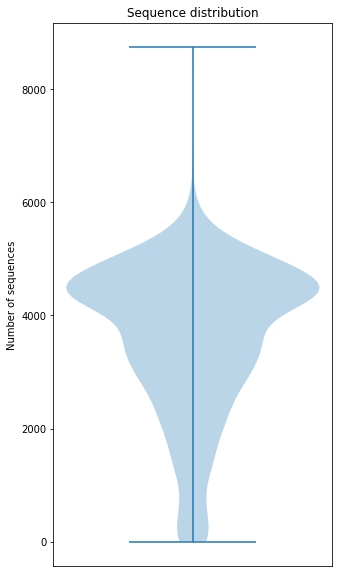

In [2]:
# Create a violinplot
plt.figure(figsize=(5, 10))
plt.title("Sequence distribution")
plt.violinplot(sequences, vert=True, widths=0.7, showmeans=False, showextrema=True, showmedians=False)
plt.xticks([], [])
# Add labels and title
plt.ylabel('Number of sequences')

plt.savefig("violinplot_sequences.eps", type="eps")

C:\Users\Sevvalli Thavapalan\AppData\Local\Temp\ipykernel_13452\570958502.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("violinplot_frequency_score.eps", type="eps")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


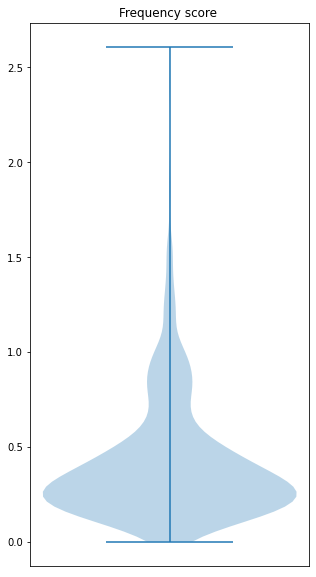

In [3]:
# Create a violinplot
plt.figure(figsize=(5, 10))
plt.title("Frequency score ")
plt.violinplot(pd_df["Mut/Len"], vert=True, widths=0.7, showmeans=False, showextrema=True, showmedians=False)
plt.xticks([], [])
# Add labels and title
plt.ylabel('')
plt.savefig("violinplot_frequency_score.eps", type="eps")

C:\Users\Sevvalli Thavapalan\AppData\Local\Temp\ipykernel_13452\790457208.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Frequency_dist.eps", type = "eps")


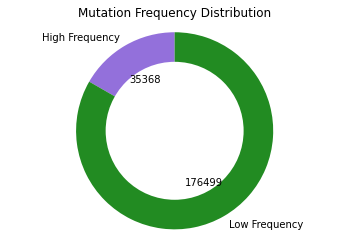

In [4]:
sum_all = pd_df["Sum"].sum()
high_freq = pd_df["Mutationsoverx10"].sum()
low_freq = pd_df["Mutations <= 10"].sum()
# Data for the donut plot
sizes = [high_freq, low_freq]
labels = ['High Frequency', 'Low Frequency']
colors = ['mediumpurple', 'forestgreen']  # You can customize the colors

# Create a donut plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=90, colors=colors, wedgeprops=dict(width=0.4))

# Draw a white circle in the center to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the donut is circular
ax.axis('equal')

# Set a title
plt.title('Mutation Frequency Distribution')
plt.savefig("Frequency_dist.eps", type = "eps")

C:\Users\Sevvalli Thavapalan\AppData\Local\Temp\ipykernel_13452\435726357.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("top10_genes.eps", type = "eps")


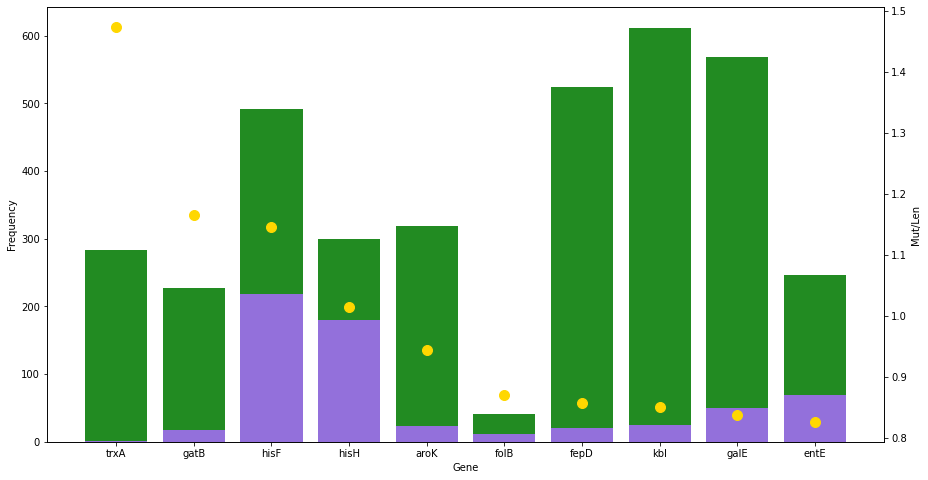

In [7]:

# Assuming pd_df is your DataFrame with columns "Sum", "Column1", and "Column2"
top5 = pd_df.nlargest(10, 's-score').set_index('Gene')

# Stacked horizontal bar plot
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.bar(
    x=top5.index,  # Using the index of top5 as x values
    height=top5['Mutationsoverx10'],
    color='mediumpurple',
    label='High frequency'
)

ax1.bar(
    x=top5.index,
    height=top5['Mutations <= 10'],
    color='forestgreen',
    bottom=top5['Mutationsoverx10'],  # Stack on top of the first bar
    label='Low frequency'
)

ax1.set_xlabel('Gene')
ax1.set_ylabel('Frequency')

# Create a second y-axis on the left side
ax2 = ax1.twinx()

# Scatter plot on the second y-axis
ax2.scatter(
    x=top5.index,
    y=top5['s-score'],
    color='gold',
    marker='o',
    s=100,
    label='Mut/Len Scatter'
)

ax2.set_ylabel('S-score')
ax2.tick_params(axis='y' )
plt.savefig("top10_genes.eps", type = "eps")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


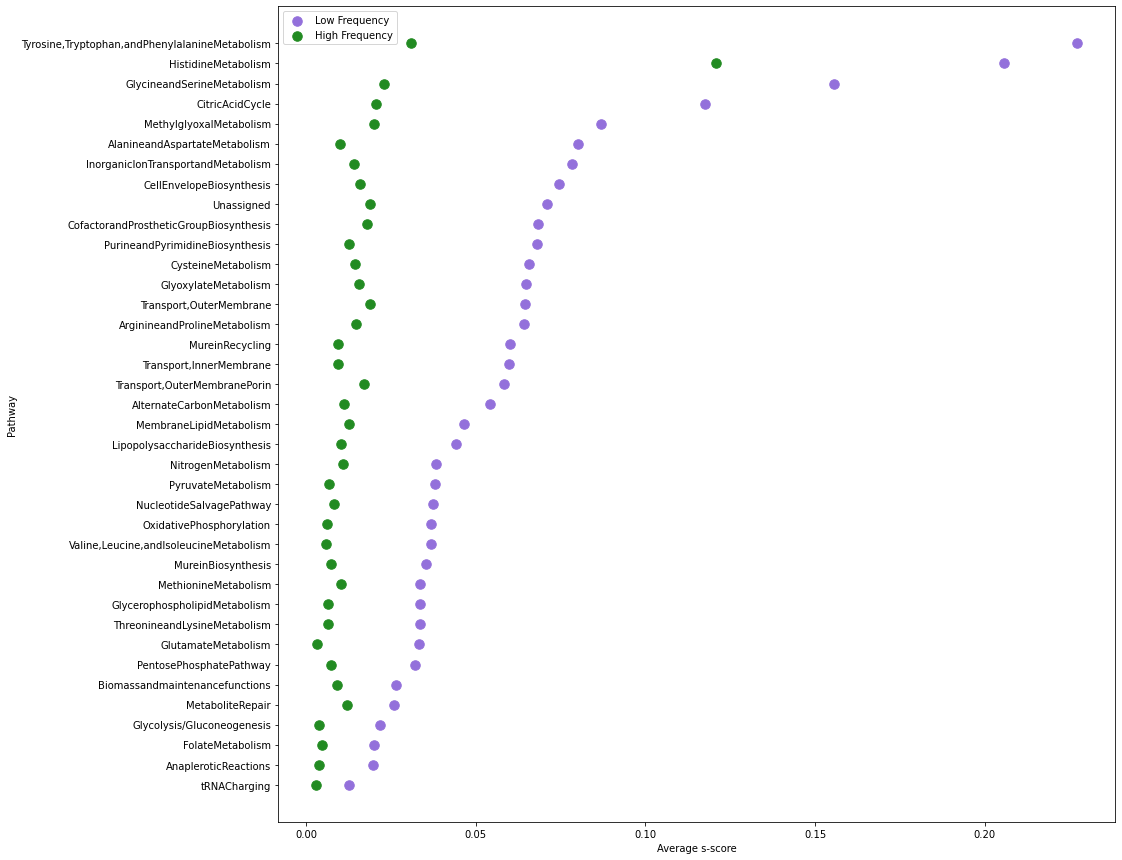

In [9]:
low_freq_groups = pd_df.groupby("Pathway")["Mutations <= 10"].sum()
high_freq_groups = pd_df.groupby("Pathway")["Mutationsoverx10"].sum()

len_prots_pathways = pd_df.groupby("Pathway")["Length Protein"].sum()


# Divide each entry in 'Value' by the sum of 'OtherColumn'
result = low_freq_groups.div(len_prots_pathways, fill_value=0)
result_2 = high_freq_groups.div(len_prots_pathways, fill_value=0)

# Calculate the average of 'AnotherColumn' for each group
another_column_avg = pd_df.groupby("Pathway")["s-score"].mean()

# Multiply 'result' and 'result_2' with the average of 'AnotherColumn'
result_with_avg = result.mul(another_column_avg, fill_value=0)
result_2_column_avg = result_2.mul(another_column_avg, fill_value=0)

# Assuming 'result' is your resulting Series
result_sorted = result_with_avg.sort_values()
result_2_sorted = result_2_column_avg.sort_values()


plt.figure(figsize=(15, 15))

# Plotting the scatter plot for low_freq_groups
plt.scatter(y=result_sorted.index, x=result_sorted.values, c="mediumpurple", s=90, label="Low Frequency")

# Plotting the scatter plot for high_freq_groups
plt.scatter(y=result_2_sorted.index, x=result_2_sorted.values, c="forestgreen", s=90, label="High Frequency")

#plt.xticks(rotation=90, ha="right")
plt.ylabel('Pathway')
plt.xlabel('Average s-score')
plt.legend()
plt.savefig("pathway_frequency_high_low_scatter.eps")

